# Import Library

In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uni

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip3 install tensorflow_decision_forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_decision_forests
    Found existing installation: tensorflow_decision_forests 1.11.0
    Uninstalling tensorflow_decision_forests-1.11.0:
      Successfully uninstalled tensorflow_decision_forests-1.11.0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Dataset

## Download Data from Kaggle

In [ ]:
!kaggle datasets download -d dwikrisda/skin-problem-dataset
!unzip skin-problem-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/dwikrisda/skin-problem-dataset
License(s): unknown
 85% 29.0M/34.1M [00:02<00:00, 14.4MB/s]
100% 34.1M/34.1M [00:02<00:00, 15.5MB/s]
Archive:  skin-problem-dataset.zip
  inflating: Skin Problem Dataset/Test/Acne/Acne_100.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_101.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_102.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_103.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_105.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_106.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_108.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_109.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_11.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_112.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_12.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_14.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_15.jpg  
  inflating: Skin Proble

# Pre Processing Dataset

## Check The Dataset Folder

In [ ]:
# Path folder di Google Drive
folder_path = '/content/Skin Problem Dataset'

# List semua file dalam folder
file_names = os.listdir(folder_path)
print(f"Files in folder: {file_names}")

Files in folder: ['Train', 'Test']


## Count Total Images in Every Folder

In [ ]:
# Define train and test folder
train_folder = '/content/Skin Problem Dataset/Train'
test_folder = '/content/Skin Problem Dataset/Test'

def count_images_in_folder(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                total_images += 1
    return total_images

def count_images_in_train_test(train_folder, test_folder):
    # Check the subfolder in the dataset
    subfolders = [f.name for f in os.scandir(train_folder) if f.is_dir()]

    for subfolder in subfolders:
        train_subfolder_path = os.path.join(train_folder, subfolder)
        test_subfolder_path = os.path.join(test_folder, subfolder)

        # Count the images in train and test
        train_images = count_images_in_folder(train_subfolder_path)
        test_images = count_images_in_folder(test_subfolder_path)

        print(f"Total images in 'train/{subfolder}': {train_images}")
        print(f"Total images in 'test/{subfolder}': {test_images}")

count_images_in_train_test(train_folder, test_folder)

Total images in 'train/Milia': 98
Total images in 'test/Milia': 78
Total images in 'train/Acne': 96
Total images in 'test/Acne': 72
Total images in 'train/Bags': 65
Total images in 'test/Bags': 50
Total images in 'train/Bruntusan': 99
Total images in 'test/Bruntusan': 79
Total images in 'train/Bopeng': 95
Total images in 'test/Bopeng': 73
Total images in 'train/Redness': 53
Total images in 'test/Redness': 43


## Generate Train dan Validation Dataset

In [ ]:
# Define the train and test directory
train_dir = '/content/Skin Problem Dataset/Train'
val_dir = '/content/Skin Problem Dataset/Test'

# Train data generator
train_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    color_mode="rgb",
)

# Validation data generator
val_generator = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    color_mode="rgb",
)

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_generator
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (val_generator
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 506 files belonging to 6 classes.
Found 395 files belonging to 6 classes.


# Modelling

## Create Model Layers

In [ ]:
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    # Define the model
    model = tf.keras.models.Sequential([
        # Define an input layer
        tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
        # Rescale images
        tf.keras.layers.Rescaling(1./255),
        # First Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the output and add dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='relu'),

        # Output layer with 6 units equal to the number of classes
        tf.keras.layers.Dense(6, activation='softmax')  # Softmax for multi-class classification
    ])

    return model

In [ ]:
# Create the model
model= create_model()

## Compile Model

In [ ]:
# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

## Model Summary

In [ ]:
#Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

## Model Evaluation

In [ ]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 256, 256, 3)
Output shape: (None, 6)


In [ ]:
for images, labels in train_dataset_final.take(1):
	example_batch_images = images
	example_batch_labels = labels

try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 6)


## Callbacks

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs=0):

        # Check if the accuracy is greater or equal to 0.98
        if logs['accuracy']>= 0.98:

            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 98% accuracy so cancelling training!")

## Training Model

In [ ]:
# Train the model
history = model.fit(train_dataset_final,
                    epochs=500,
                    validation_data=validation_dataset_final, callbacks=[EarlyStoppingCallback()])

Epoch 1/500
16/16 [==============================] - 20s 531ms/step - loss: 1.7867 - accuracy: 0.1660 - val_loss: 1.7677 - val_accuracy: 0.2000
Epoch 2/500
16/16 [==============================] - 2s 118ms/step - loss: 1.7705 - accuracy: 0.2036 - val_loss: 1.7583 - val_accuracy: 0.2000
Epoch 3/500
16/16 [==============================] - 2s 103ms/step - loss: 1.7643 - accuracy: 0.2154 - val_loss: 1.7419 - val_accuracy: 0.2709
Epoch 4/500
16/16 [==============================] - 1s 89ms/step - loss: 1.7252 - accuracy: 0.2510 - val_loss: 1.6369 - val_accuracy: 0.3646
Epoch 5/500
16/16 [==============================] - 1s 81ms/step - loss: 1.5492 - accuracy: 0.3538 - val_loss: 1.4520 - val_accuracy: 0.3671
Epoch 6/500
16/16 [==============================] - 1s 80ms/step - loss: 1.4530 - accuracy: 0.3399 - val_loss: 1.4220 - val_accuracy: 0.3975
Epoch 7/500
16/16 [==============================] - 1s 80ms/step - loss: 1.4255 - accuracy: 0.3953 - val_loss: 1.4011 - val_accuracy: 0.3494
Ep

## Plotting Accuracy and Loss

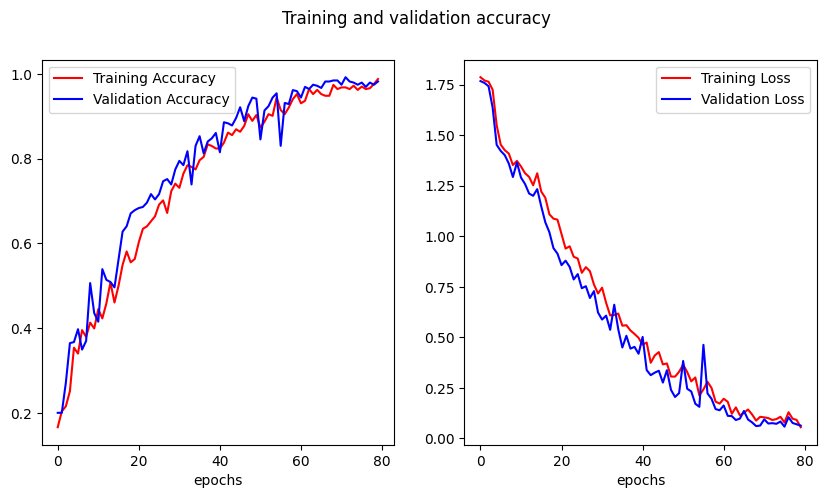

In [ ]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

# Save and Convert Model

In [ ]:
# Attempt to convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
!pip install protobuf==3.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.1/360.1 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.2.0 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.2.0 which is incompatible.
google-cloud-aiplatform 1.73.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.2.0 which is incompatible.
google-cloud-bigquery-connection 1.16.1 requi

In [ ]:
import tensorflow as tf
from tensorflow import lite

In [ ]:
# # from tflite_support.metadata import metadata_schema_py_generated as _metadata_fb
# from tflite_support.metadata.metadata_writers import writer_utils
# from tflite_support.metadata.metadata_writers import image_classifier

# # Load your TFLite model
# MODEL_PATH = "model.tflite"
# with open(MODEL_PATH, "rb") as f:
#     tflite_model = f.read()

# # Create metadata for the model using tflite-support
# writer = image_classifier.MetadataWriter.create_for_inference(
#     model_buffer=tflite_model,
#     input_norm_mean=[127.5],  # Normalization mean value for input
#     input_norm_std=[127.5],   # Normalization standard deviation value for input
#     label_file_paths=["labels.txt"]  # Path to your labels file
# )

# # Populate metadata
# metadata_buf = writer.populate()

# # Save the model with metadata
# UPDATED_MODEL_PATH = "model_with_metadata.tflite"
# writer_utils.save_file(metadata_buf, UPDATED_MODEL_PATH)
# print(f"Model with metadata saved to {UPDATED_MODEL_PATH}")

## Save to .h5 Model

In [ ]:
saved_model_path = "sample_data/model.h5"

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Save to SavedModel

In [ ]:
saved_model_path = "./my_model"
model.save(saved_model_path)

print(f"Model telah disimpan ke {saved_model_path}")

Model telah disimpan ke ./my_model


## Convert to TensorFlow Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("./my_model") # path to the SavedModel directory
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

## Convert to TensorFlow.js Model

In [ ]:
!tensorflowjs_converter --input_format=keras sample_data/model.h5 sample_data/tfjs_model_tf

Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 29, in <module>
    import tensorflow.compat.v1 as tf1
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py", line 48, in <module>
    from tensorflow._api.v2 import __internal__
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__internal__/__init__.py", line 8, in <module>
    from tensorflow._api.v2.__internal__ import autograph
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/__interna

In [ ]:
!zip -r /content/sample_data/tfjs_model.zip /content/sample_data/tfjs_model_tf/

	zip warning: name not matched: /content/sample_data/tfjs_model_tf/

zip error: Nothing to do! (try: zip -r /content/sample_data/tfjs_model.zip . -i /content/sample_data/tfjs_model_tf/)


## Conversion Check

In [ ]:
# Unucomment this if you want to check whether your conversion is success

# !tensorflowjs_converter --input_format=tfjs_layers_model --output_format=keras /content/sample_data/tfjs_model_tf/model.json /content/model_converted.h5


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/model_converted.h5')
model.summary()

OSError: No file or directory found at /content/model_converted.h5

In [ ]:
loaded_model = tf.keras.models.load_model(saved_model_path)
loaded_model.summary()

# Model Testing

## Test Model with other image

In [ ]:
# Create the widget and take care of the display
from ipywidgets import widgets
from io import BytesIO
import tensorflow as tf
import numpy as np

# Initialize the file upload widget
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Define a function to handle predictions
def file_predict(filename, file, out):
    """A function for creating the prediction and printing the output."""
    # Load and preprocess the image
    image = tf.keras.utils.load_img(file, target_size=(256, 256))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    prediction = model.predict(image, verbose=0)[0]

    # Classes corresponding to the model output
    classes = ['Acne', 'Bags', 'Bopeng', 'Bruntusan', 'Milia', 'Redness']

    # Get the index of the highest probability
    max_index = np.argmax(prediction)
    max_prob = prediction[max_index]
    max_class = classes[max_index]

    # Display the prediction
    with out:
        print(f'\nModel output for {filename}:')
        print(f'  - Predicted class: {max_class} with probability {max_prob:.5f}')

# Define the file upload handler
def on_upload_change(change):
    """A function for getting files from the widget and running the prediction."""
    items = change['new']  # Access the newly uploaded files
    for filename, file_info in items.items():  # Loop through each uploaded file
        file_jpgdata = BytesIO(file_info['content'])
        file_predict(filename, file_jpgdata, out)

# Attach the observer to the uploader widget
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

## Confusion Matrix

In [ ]:
def plot_confusion_matrix(model, dataset, class_names):
    """
    Plot a confusion matrix for a given model and dataset.

    Args:
        model (tf.keras.Model): Trained Keras model.
        dataset (tf.data.Dataset): Dataset to evaluate (e.g., validation or test set).
        class_names (list): List of class names corresponding to the output labels.
    """
    # Get true labels and predictions
    y_true = np.concatenate([y for _, y in dataset], axis=0)
    y_pred = np.argmax(model.predict(dataset), axis=1)

    # Convert one-hot encoded labels to integers if necessary
    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

class_names = ['Acne', 'Bags', 'Bopeng', 'Bruntusan', 'Milia', 'Redness']
plot_confusion_matrix(model, validation_dataset_final, class_names)